In [27]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import datetime
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.options.display.max_columns=60
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Creating 166 batches with 512 shuffles pictures. Shuffel is done for whole set of train pictures.

Augmentacja tylko trenigu

EfficentNet - zostajemy

https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
keras.iokeras.io

https://albumentations.ai/

GAN dostrajanie stylu

IoU - dla nas się nie sprawdzi tylko zdjęcia ptaków

Warstwy ilosc nueronów rosnie/maleje

Ile i jakich agumtancji do jakiej ilośc zdjęci dążymy i czy muszą być równomiernie rozłożone?

Ilość neroów ukrytej do ilosc wejsc/wyjsc?

525 klas i na poziomie apliacji przekazana informracja o statusie.

Metryka porawność rozpoznawani prawidłowego do wszystkich klas i fałszywie pozytwyne będą mieć większą wartość w celu ochrony ptaka.

Gdzie można wykorzystać aby zapilkować gotowy model.


## Importing two data sets:

+ df_status is data from ICUN with information about status protection of bird.
+ df_lp is data with information about images path,which set it is (train,valid,test)

##### Join will be done base on scientiffic name because it is unique for species and can be used to join both data frames.

In [3]:
df_status = pd.read_csv(r"C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\IUCN\assessments.csv")

In [4]:
df_lp = pd.read_csv(r"C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\archive (1)\birds.csv")

In [5]:
df_lp.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [6]:
df_status.head()

,assessmentId,internalTaxonId,scientificName,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,habitat,threats,population,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
0,84694321,22679393,Polyplectron schleiermacheri,Endangered,C2a(i),2016,2016-10-01 00:00:00 UTC,3.1,English,This elusive species's status is difficult to ...,Its ecological needs are poorly understood. An...,"In central Kalimantan, habitat loss, degradati...","The population is estimated to number 1,000-2,...",Decreasing,<em>Polyplectron schleiermacheri</em> is endem...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Indomalayan,NaN,False,False,Global
1,89641304,22720960,Emberiza rustica,Vulnerable,A2abcd+3bcd+4abcd,2016,2016-10-01 00:00:00 UTC,3.1,English,This species has been uplisted to Vulnerable a...,The species breeds in swampy lowland spruce (<...,The numbers of this species have declined in t...,"The European population is estimated at 681,00...",Decreasing,This bunting breeds across northern latitudes ...,NaN,Terrestrial|Freshwater (=Inland waters),<strong>Conservation and research actions unde...,Indomalayan|Nearctic|Palearctic,NaN,False,False,Global
2,90341807,22728245,Chlamydotis undulata,Vulnerable,A2cd+3cd+4cd,2016,2016-10-01 00:00:00 UTC,3.1,English,This recently split species is listed as Vulne...,It inhabits sandy and stony semi-desert and is...,"The principal threat is from hunting, which ha...","In the mid-1990s, this species's population wa...",Decreasing,This species&#160;occurs across a wide range i...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Afrotropical|Palearctic,NaN,False,False,Global
3,92761019,22678194,Crypturellus kerriae,Vulnerable,"B1ab(i,ii,iii,v);C2a(i)",2016,2016-10-01 00:00:00 UTC,3.1,English,This species is Vulnerable because it is known...,It occurs in humid primary forest. The known s...,Vast areas of seemingly suitable habitat remai...,"The population is estimated to number 2,500-9,...",Decreasing,<em>Crypturellus kerriae</em> is a poorly-know...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Neotropical,NaN,False,False,Global
4,92761578,22678217,Crypturellus noctivagus,Near Threatened,A2cd+3cd+4cd,2016,2016-10-01 00:00:00 UTC,3.1,English,This species is classified as Near Threatened ...,"It occurs in caatinga and Atlantic forest, par...",It suffers from widespread and continuing habi...,The global population size has not been quanti...,Decreasing,<em>Crypterellus noctivagus</em> is rare to lo...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Neotropical,NaN,False,False,Global


In [7]:
## adjusting name of columns to scientificName for unifying
df_lp = df_lp.rename(columns={'scientific name' : 'scientificName'})
df_lp['scientificName'] = df_lp['scientificName'].apply(lambda  x : x.lower())
df_status['scientificName'] = df_status['scientificName'].apply(lambda  x : x.lower())

In [8]:
df_status = df_status.set_index(['scientificName'])

In [9]:
df = df_lp.join(df_status,on='scientificName')

In [10]:
df_train = df[df['data set'] == 'train'].copy()
df_test = df[df['data set'] == 'test'].copy()
df_valid = df[df['data set'] == 'valid'].copy()

In [11]:
df_train


,class id,filepaths,labels,data set,scientificName,assessmentId,internalTaxonId,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,habitat,threats,population,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84630,524.0,train/BLACK BREASTED PUFFBIRD/151.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84631,524.0,train/BLACK BREASTED PUFFBIRD/152.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84632,524.0,train/BLACK BREASTED PUFFBIRD/153.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84633,524.0,train/BLACK BREASTED PUFFBIRD/146.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# droping unwated columns
list_col = list(df.iloc[:,8:].columns) + ['assessmentId','internalTaxonId']
df = df.drop(columns=list_col)

In [186]:
# extract from directory datasets train,test,valid
train = tf.keras.utils.image_dataset_from_directory(
    directory=r'archive (1)\train',
    labels="inferred", # geting names from labels as the name of folder
    label_mode="categorical", # type of labels
    class_names=None,
    color_mode="rgb",
    image_size=(224, 224),
    batch_size=32,
    seed=42,
    validation_split=None,
    subset=None,
    follow_links=False,
    crop_to_aspect_ratio=False,
)
test = tf.keras.utils.image_dataset_from_directory(
    
    directory=r'archive (1)\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    seed=42,
    validation_split=None,
    subset=None,
    follow_links=False,
    crop_to_aspect_ratio=False,
)
valid = tf.keras.utils.image_dataset_from_directory(
    directory=r'archive (1)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    seed=42,
    validation_split=None,
    subset=None,
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [15]:
train.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=84635>

In [294]:
class_names_

NameError: name 'class_names_valid' is not defined

In [16]:
#creating lables for NNm to be able to use OneHotEcoder
class_names_train = df['labels'].unique()

In [270]:
class_names_train.shape

(525, 525)

In [17]:
class_names_train = OneHotEncoder().fit_transform(class_names_train.reshape(-1,1)).toarray()

In [18]:
# Checkinkg batch information labels,img height, img width,colors and nubmer of labels
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(224, 224, 3)
(525,)


In [263]:
labels_batch

<tf.Tensor: shape=(525,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [21]:
# creating normalization layer to noramlize numbers in image
normalization_layer = tf.keras.layers.Rescaling(1./255)

### Trouble to resolve: normalization is working on Batch and not on all data. Is need to change order of action. 


In [22]:
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[3]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.3803922 0.85098046


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_buff = train.cache().prefetch(buffer_size=AUTOTUNE)
valid_buff = valid.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
train_shuff = train.shuffle(256,seed=42, reshuffle_each_iteration=False).batch(256)

In [ ]:
# definicja bloku resnet
def res_block(input, filters):
    x_1 = keras.layers.Conv2D(filters=filters, kernel_size = (3,3), padding = 'same')(input)
    x_1 = keras.layers.BatchNormalization()(x_1)
    x_1 = keras.layers.ReLU()(x_1)

    x_2 = keras.layers.Conv2D(filters=filters, kernel_size = (3,3), padding = 'same')(x_1)
    x_2 = keras.layers.BatchNormalization()(x_2)

    output = keras.layers.Add()([input,x_2])
    output = keras.layers.ReLU()(output)

    return output

In [39]:
num_class = 525

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(64,64,3)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu',strides=1,padding="SAME"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="SAME"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(num_class))
model.add(tf.keras.layers.Softmax()) 

num_class = 525

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(224,224,3)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu',strides=1,padding="SAME"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="SAME"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(num_class))
model.add(tf.keras.layers.Softmax()) 


In [40]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

Batch 128 25 minut loss 9.**** accurac 0.00??
Batch 512 1,5 h

In [66]:
def rescale_img(img):
    img = img / 255.0
    img = (img - 0.5) * 2
    return img

In [77]:
train_datagen = ImageDataGenerator(
    rotation_range=10,      # zakres kąta o który losowo zostanie wykonany obrót obrazów
    rescale= 1./255,
    width_shift_range=0.1,  # pionowe przekształcenia obrazu
    height_shift_range=0.1, # poziome przekształcenia obrazu
    #shear_range=0.2,        # zares losowego przycianania obrazu
    #zoom_range=0.2,         # zakres losowego przybliżania obrazu
    #horizontal_flip=True,   # losowe odbicie połowy obrazu w płaszczyźnie poziomej
    fill_mode='nearest'     # strategia wypełniania nowo utworzonych pikseli, któe mogą powstać w wyniku przekształceń
)
# przeskalowujemy wszystkie obrazy o współczynnik 1/255 - zamiana na wwartosc od -1 do 1
valid_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(directory=r'C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\archive (1)\train',
                                                   target_size=(224,224),
                                                   batch_size=512,
                                                   class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(directory=r'C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\archive (1)\valid',
                                                   target_size=(224,224),
                                                   batch_size=512,
                                                   class_mode='categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


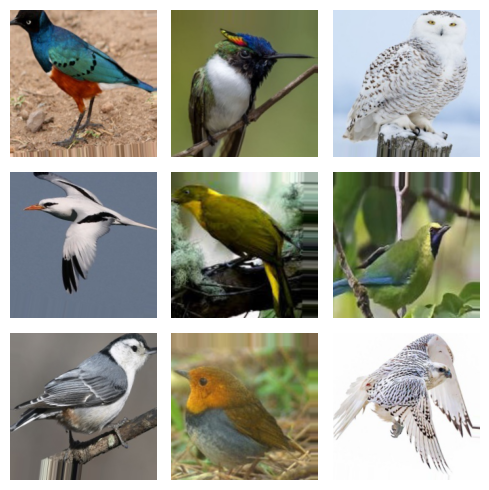

In [73]:
def display_augmented_images(generator):
    plt.figure(figsize=(5, 5))
    for i in range(9):
        augmented_images = next(generator)
        for j in range(len(augmented_images[0])):
            plt.subplot(3, 3, i + 1)
            plt.imshow(augmented_images[0][j])
            plt.axis('off')
    plt.tight_layout()
    plt.show()
display_augmented_images(train_generator)


In [42]:
log_dir = os.path.join("logs", "bird", "our-cnn", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
hisotry = model.fit_generator(
  train_generator,
  steps_per_epoch = 331,
  validation_data=valid_generator,
  epochs=1,
  callbacks=[tensorboard_callback]
)

C:\Users\Data\AppData\Local\Temp\ipykernel_44160\1407422696.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hisotry = model.fit_generator(


108/331 [========>.....................] - ETA: 5:48 - loss: 6.2769 - accuracy: 0.0029

KeyboardInterrupt: 

In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 256)               102760704 
                                                                 
 dense_1 (Dense)             (None, 525)               134925    
                                                                 
 softmax (Softmax)           (None, 525)               0         
                                                        

In [168]:
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)
base_model.trainable = False

In [156]:
input_shape = (224,224,3)

In [157]:
inputLayer = tf.keras.Input(shape=(input_shape))

In [158]:
x = base_model(inputLayer, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(525)(x)

In [ ]:
x = base_model(inputLayer, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(525,activation='softmax')(x)

In [159]:
model = tf.keras.Model(inputLayer, output)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 525)               672525    
                                                                 
Total params: 4,722,096
Trainable params: 672,525
Non-trainable params: 4,049,571
_________________________________________________________________


In [160]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

model.fit(
  train,
  validation_data=valid,
  epochs=1,
  batch_size = 128
)

In [161]:

def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img


In [181]:
train_datagen = ImageDataGenerator(
    #rotation_range=10,      # zakres kąta o który losowo zostanie wykonany obrót obrazów
    preprocessing_function=prep_fn,
    #width_shift_range=0.2,  # pionowe przekształcenia obrazu
    #height_shift_range=0.2, # poziome przekształcenia obrazu     
    #horizontal_flip=True,   # losowe odbicie połowy obrazu w płaszczyźnie poziomej
    #fill_mode='nearest'     # strategia wypełniania nowo utworzonych pikseli, któe mogą powstać w wyniku przekształceń
)
# przeskalowujemy wszystkie obrazy o współczynnik 1/255 - zamiana na wwartosc od -1 do 1
#valid_datagen = ImageDataGenerator( preprocessing_function=prep_fn)
train_generator = train_datagen.flow_from_directory(directory=r'C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\archive (1)\train',
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(directory=r'C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\archive (1)\valid',
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [167]:
train_generator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

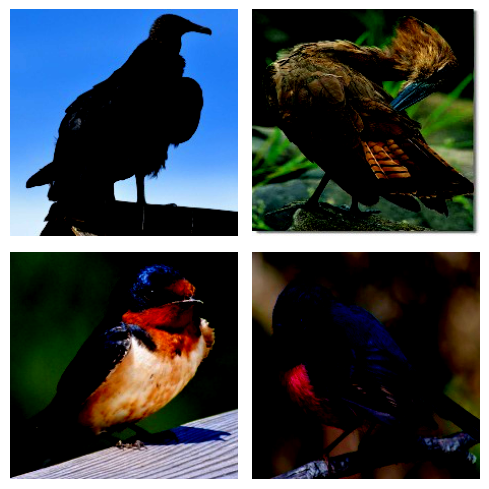

In [182]:
def display_augmented_images(generator):
    plt.figure(figsize=(5, 5))
    for i in range(4):
        augmented_images = next(generator)
        for j in range(len(augmented_images[0])):
            plt.subplot(2,2, i + 1)
            plt.imshow(augmented_images[0][j])
            plt.axis('off')
    plt.tight_layout()
    plt.show()
display_augmented_images(train_generator)

In [172]:
batch_size = 32

In [173]:
steps_per_epoch = 84625/batch_size  
validation_steps = 2625/batch_size

In [166]:
log_dir = os.path.join("logs", "bird", "our-cnn", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
hisotry = model.fit_generator(
  train_generator,
  steps_per_epoch = steps_per_epoch,
  validation_data=valid_generator,
  validation_steps=validation_steps,
  epochs=10,
  callbacks=[tensorboard_callback]
)

C:\Users\Data\AppData\Local\Temp\ipykernel_44160\3986063550.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hisotry = model.fit_generator(


Epoch 1/10
1322/1322 [==============================] - 3213s 2s/step - loss: 9.8357 - accuracy: 0.0026 - val_loss: 10.0657 - val_accuracy: 0.0019
Epoch 2/10
1322/1322 [==============================] - 3211s 2s/step - loss: 9.3566 - accuracy: 0.0031 - val_loss: 9.3712 - val_accuracy: 0.0019
Epoch 3/10
1322/1322 [==============================] - 3203s 2s/step - loss: 8.2655 - accuracy: 0.0031 - val_loss: 7.4297 - val_accuracy: 0.0019
Epoch 4/10
1322/1322 [==============================] - 3171s 2s/step - loss: 7.4503 - accuracy: 0.0031 - val_loss: 7.4297 - val_accuracy: 0.0019
Epoch 5/10
1312/1322 [============================>.] - ETA: 23s - loss: 7.4525 - accuracy: 0.0031

KeyboardInterrupt: 

In [169]:
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
])

In [188]:
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

In [190]:
inputs = pretrained_model.input
x = augment(inputs)

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dropout(0.45)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.45)(x)


outputs = tf.keras.layers.Dense(525, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)


history = model.fit(
  train,
  batch_size = 32,
  validation_data=valid,
  epochs=10,

)


Epoch 1/10
2645/2645 [==============================] - 3640s 1s/step - loss: 5.9840 - accuracy: 0.0070 - val_loss: 5.4801 - val_accuracy: 0.0187
Epoch 2/10
2645/2645 [==============================] - 3406s 1s/step - loss: 5.7362 - accuracy: 0.0087 - val_loss: 5.3364 - val_accuracy: 0.0240
Epoch 3/10
2645/2645 [==============================] - 3409s 1s/step - loss: 5.6718 - accuracy: 0.0106 - val_loss: 5.2962 - val_accuracy: 0.0248
Epoch 4/10
2645/2645 [==============================] - 3411s 1s/step - loss: 5.6102 - accuracy: 0.0127 - val_loss: 5.2737 - val_accuracy: 0.0278
Epoch 5/10
2645/2645 [==============================] - 3403s 1s/step - loss: 5.5212 - accuracy: 0.0143 - val_loss: 5.1514 - val_accuracy: 0.0316
Epoch 6/10
2645/2645 [==============================] - 3416s 1s/step - loss: 5.4709 - accuracy: 0.0166 - val_loss: 5.1842 - val_accuracy: 0.0236
Epoch 7/10
2645/2645 [==============================] - 3408s 1s/step - loss: 5.4454 - accuracy: 0.0173 - val_loss: 5.0923 -

In [197]:
y_pred = model.predict(test)

83/83 [==============================] - 116s 1s/step


In [198]:
from sklearn.metrics import classification_report

In [259]:
y_test = list(test.file_paths)

In [260]:
bprint(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [292]:
test.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=83>